# Challenge 1

It's time for you to apply everything you learned by analyzing a case study of FourSquare social Network. (Foursquare is a location-based online social network. The dataset contains a list of all of the user-to-user links)

Datasource: @inproceedings{gao2012exploring,
     title={Exploring social-historical ties on location-based social networks},
     author={Gao, Huiji and Tang, Jiliang and Liu, Huan},
     booktitle={Proceedings of the 6th International AAAI Conference on Weblogs and Social Media},
     year={2012}
}

- **Data**: `FS.csv` (avaliable in Moodle)

1. Read the FS network dataset.
2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network.
3. The dataset generates a graph of 639.014 nodes, so it is massive and you won't see anything meaningful if you try to plot it. So you need to create a subset using the **degree centrality** to find out find the top 4 of the most important nodes, and use them to create a subset of the original network. 
4. Extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the original network.
5. Create a plot for the subset created.
6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`
7. Plot the Matrix, Arc and Circos from the subset.

In [1]:
cd ..

/Users/milliemccallum/Documents/Lab_assignment_2


In [2]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings('ignore')

In [3]:
import networkx as nx

In [4]:
import networkx as nx
import pandas as pd

# reading the FS network dataset 
graph_type = nx.Graph()
fs = pd.read_csv('Data/data_lab5/FS.csv')
G = nx.from_pandas_edgelist(fs)

In [8]:
# assessing the dataset and getting basic information

print(len(G))#finding the number of nodes
print(type(G.nodes())) 
print(list(G.edges(data=True))[-1]) # attributes associated with the last element of the edges list. 
print(list(G.nodes(data=True))[0]) # attributes associated with the first element of the node list.
print(type(list(G.edges(data=True))[-1][2]))

639014
<class 'networkx.classes.reportviews.NodeView'>
(94306, 128953, {})
(34802, {})
<class 'dict'>


In [5]:
# calculate degree centrality 
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality in descending order and select only the first 4 nodes
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:4]

# Print the top 4 most important nodes and their degree centrality
for node in top_nodes:
    print(f"Node {node}: Degree Centrality = {degree_centrality[node]}")

Node 106223: Degree Centrality = 0.16622197044504572
Node 89302: Degree Centrality = 0.07327393965380986
Node 76517: Degree Centrality = 0.07275908314854314
Node 66999: Degree Centrality = 0.0726119812898955


In [6]:
edges_from_top_nodes = G.edges([106223,89302,76517,66999])

In [7]:
G_sub = nx.DiGraph()
G_sub.add_edges_from(edges_from_top_nodes)


In [9]:
print(list(G_sub.nodes(data=True))[0])

(106223, {})


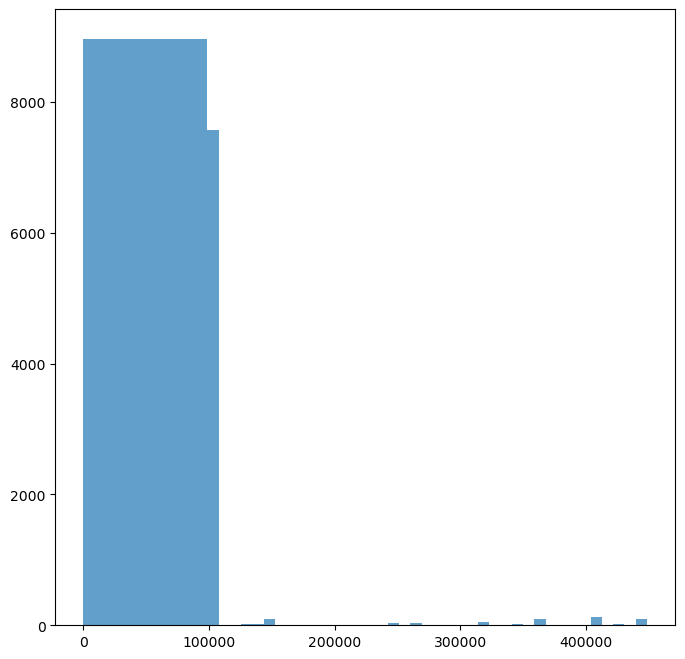

In [11]:
# plot the histogram for this subset

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.hist(G_sub, bins=50, alpha=0.7)
plt.show()


Text(0.5, 1.0, 'Histogram of degree centrality')

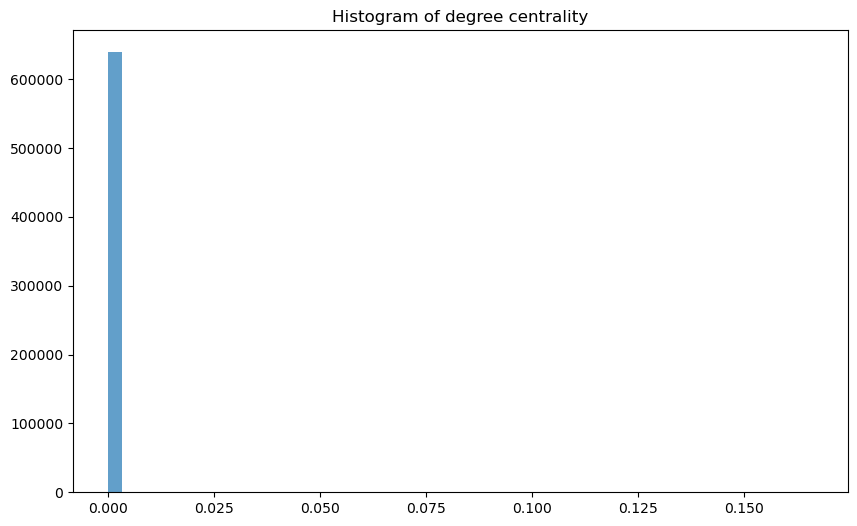

In [95]:
# plot a histogram of the degree centrality values 

plt.figure(figsize=(10, 6))
plt.hist(degree_centrality_list, bins=50, alpha=0.7)
plt.title("Histogram of degree centrality")

# the output of this is fairly unclear with only one band showing 

In [92]:
top_nodes = [106223, 89302, 76517, 66999]

# Calculate degree centrality for all nodes
centrality = nx.degree_centrality(G)

# Get only the values of degree centrality, not nodes and check 
top_centrality_values = [degree_centrality[node] for node in top_nodes]
print(top_centrality_values)

[0.16622197044504572, 0.07327393965380986, 0.07275908314854314, 0.0726119812898955]


Text(0.5, 1.0, "Histogram of top nodes' degree centrality")

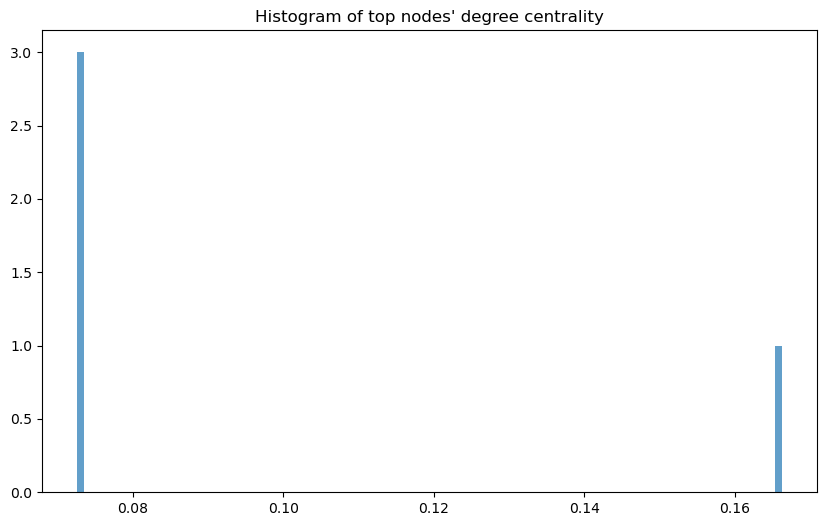

In [94]:
# plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(top_centrality_values, bins=100, alpha=0.7)
plt.title("Histogram of top nodes' degree centrality")

In [ ]:
top_nodes = [106223, 89302, 76517, 66999]

# calculating the betweeness centrality 

betweeness = nx.betweenness_centrality(G)

top_betweeness_values = [betweeness[node] for node in top_nodes]
print(top_betweeness_values)

In [ ]:
top_nodes = [106223, 89302, 76517, 66999]

top_betweeness_values = [betweeness[node] for node in top_nodes]
print(top_betweeness_values)

In [ ]:
# plot the histogram for betweeness 
plt.figure(figsize=(10, 6))
plt.hist(top_betweeness_values, bins=100, alpha=0.7)
plt.title("Histogram of top nodes' degree centrality")

# Challenge 2

This challenge is about OSMnx. You will explore and analyze a city's street network using the OSMnx Python library.

1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.
2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.
3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot
4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.
5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.
6. Create the figure-groud from the selected city
7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.
8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.
9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

In [29]:
import networkx as nx
import osmnx as ox

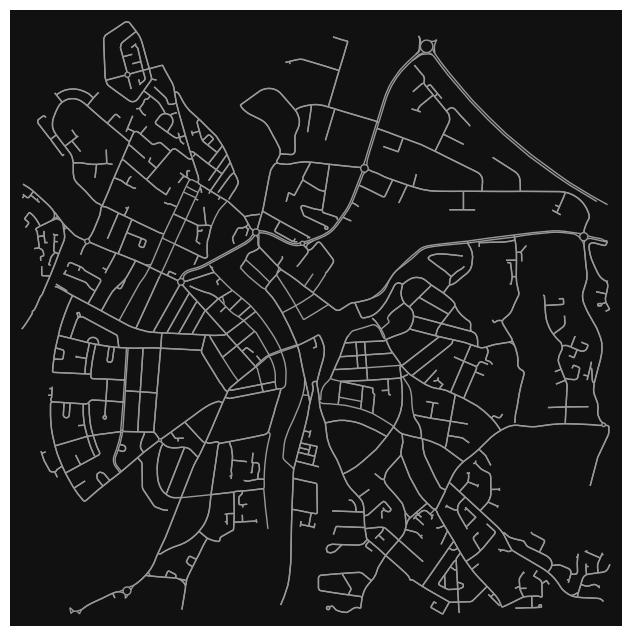

In [14]:
# downloading the street network for Inverness, Scotland using bounding box method
inverness = (57.47837655399627, -4.22521540379609)
one_mile = 1609   # meters
G = ox.graph_from_point(inverness, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(G, node_size=0)

In [15]:
# calculating the total area that the graph covers

warnings.filterwarnings('ignore')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
inverness_area_m = nodes_proj.unary_union.convex_hull.area
inverness_area_m

9297941.808395285

In [16]:
# calculating basic statistics about the graph

ox.basic_stats(G_proj, area=inverness_area_m, clean_int_tol=15)

{'n': 987,
 'm': 2195,
 'k_avg': 4.447821681864235,
 'edge_length_total': 195734.8410000001,
 'edge_length_avg': 89.1730482915718,
 'streets_per_node_avg': 2.5045592705167175,
 'streets_per_node_counts': {0: 0, 1: 268, 2: 8, 3: 659, 4: 49, 5: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.27152988855116517,
  2: 0.008105369807497468,
  3: 0.6676798378926039,
  4: 0.04964539007092199,
  5: 0.00303951367781155},
 'intersection_count': 719,
 'street_length_total': 108517.79699999992,
 'street_segment_count': 1212,
 'street_length_avg': 89.5361361386138,
 'circuity_avg': 1.0640597596973544,
 'self_loop_proportion': 0.004125412541254125,
 'clean_intersection_count': 546,
 'node_density_km': 106.15252497158235,
 'intersection_density_km': 77.32894169662382,
 'edge_density_km': 21051.416005127874,
 'street_density_km': 11671.163278524413,
 'clean_intersection_density_km': 58.722673388534915}

In [17]:
# plotting street centrality 

# converting graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

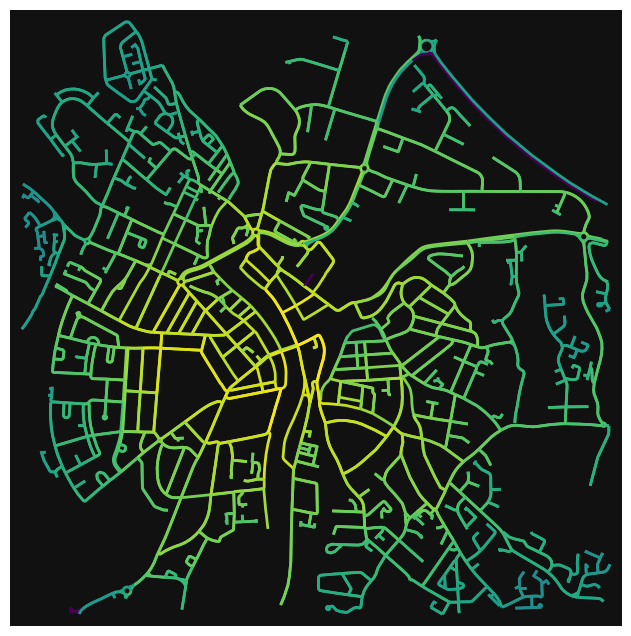

In [18]:
# plotting the centrality which measures the centrality of each edge

ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="viridis")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

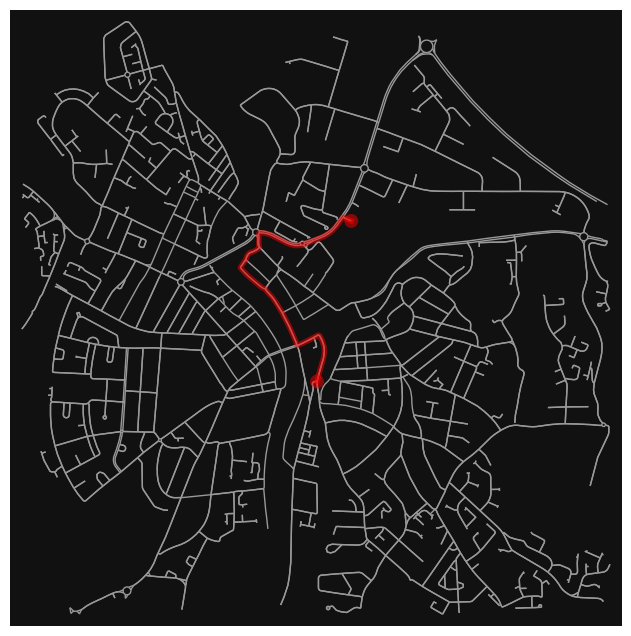

In [19]:
# calculating a route between two points in inverness

orig = ox.distance.nearest_nodes(G, X=-4.221869027260455, Y=57.4834735687117)
dest = ox.distance.nearest_nodes(G, X=-4.224866822906962, Y=57.47541546152747)

route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)



In [22]:
# calculating degree centrality for the graph

degree_centrality = nx.degree_centrality(G)


In [25]:
# calculating betweeness centrality
betweenness_centrality = nx.betweenness_centrality(G)


In [31]:
from IPython.display import Image

In [33]:
# configure the inline image display
img_folder = "images"
extension = "png"
size = 240
dpi = 40

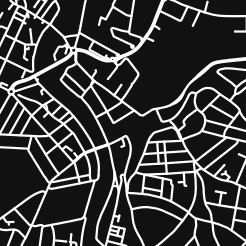

In [34]:
place = "inverness"
point = (57.47837655399627, -4.22521540379609)
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    point=point,
    network_type="drive",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

In [37]:
# exploring nodes and edges
nodes, edges = ox.graph_to_gdfs(G)
m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="pink", marker_kwds={"radius": 6})

In [36]:
# exploring graph nodes interactively and colored by degree centrality
nx.set_node_attributes(G, nx.degree_centrality(G), name="bc")
nodes = ox.graph_to_gdfs(G, edges=False)
nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 8})

In [38]:
# Save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

In [47]:
# using OSMnx to extract other building footprint 

place = "Inverness"
tags = {"building": True}
gdf = ox.features_from_place(place, tags)
gdf.shape



(665, 18)

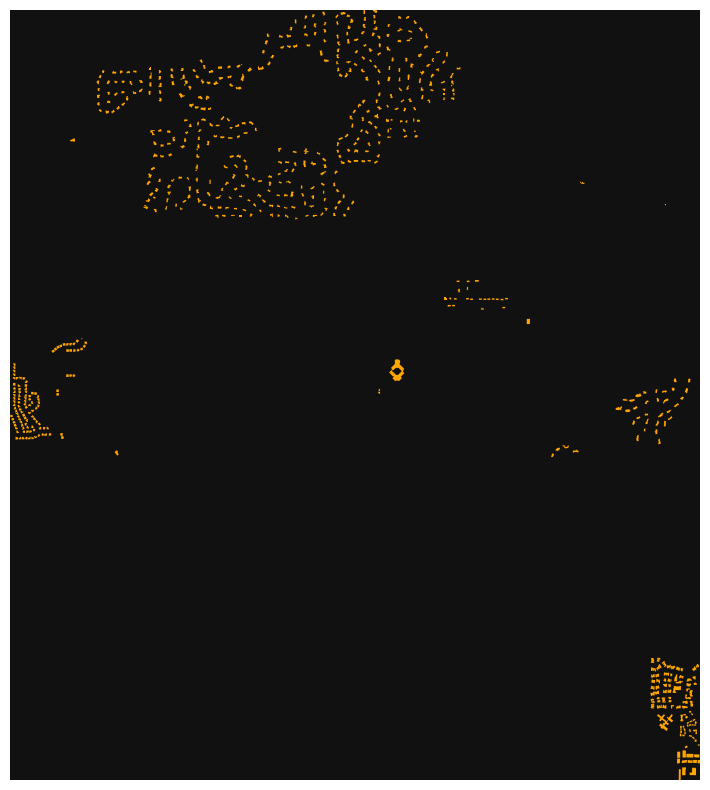

In [45]:
warnings.simplefilter('ignore', DeprecationWarning)

fig, ax = ox.plot_footprints(gdf, figsize=(12, 10))